### **Cross Validation Analysis**

In [1]:
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt

project_root = Path(os.getcwd()).resolve().parent

sys.path.append(str(project_root))

from src.utils import read_processed_data, config_loader, get_logger


log = get_logger()
config = config_loader()
path_svc = os.path.join(project_root, config['cv_result'], 'svc_results.csv')
path_knn = os.path.join(project_root, config['cv_result'], 'knn_results.csv')
path_rf = os.path.join(project_root, config['cv_result'], 'rf_results.csv')
path_xgb = os.path.join(project_root, config['cv_result'], 'xgb_results.csv')

cv_result = read_processed_data(path=path_svc, log=log)
cv_result = cv_result.sort_values(by='param_C')

2025-08-21 02:08:51.456 | INFO     | src.utils:read_processed_data:56 - Data read successfully from /home/runner/work/aqi-healthy-air/aqi-healthy-air/cv_results/svc_results.csv


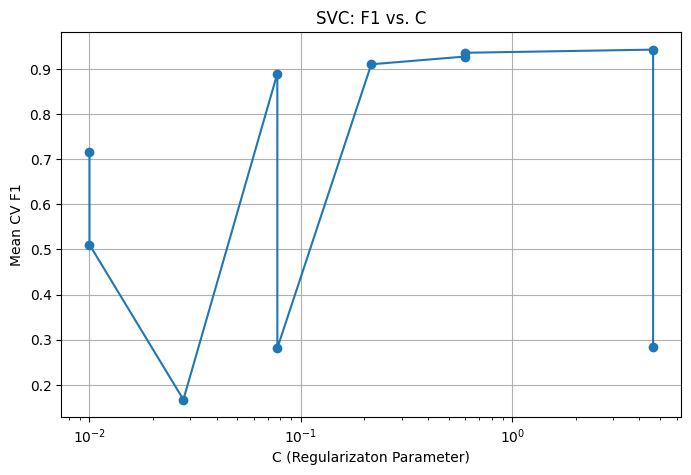

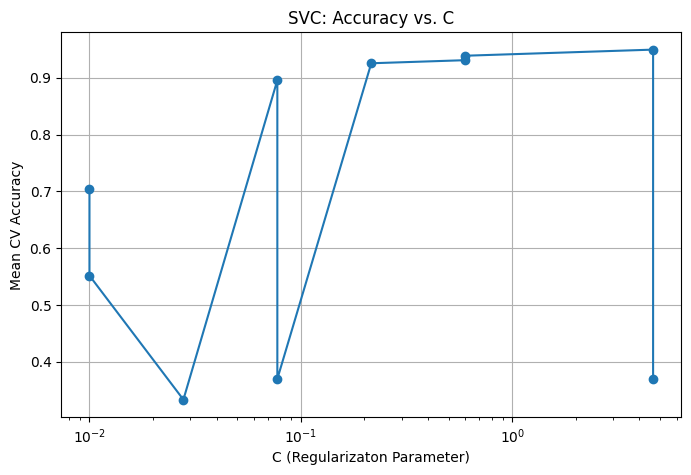

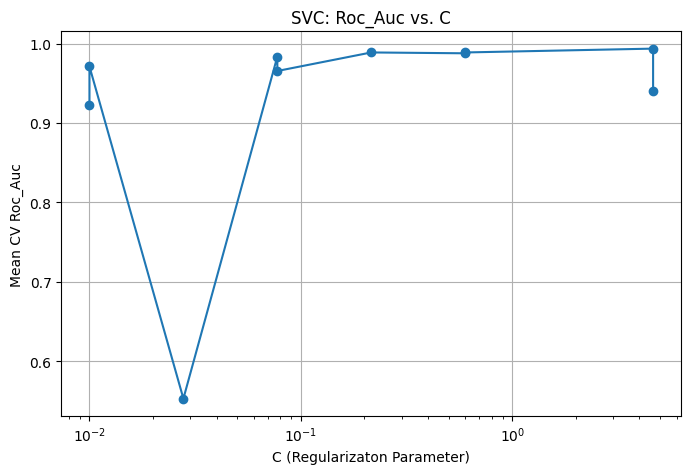

In [2]:
parameter = ['mean_test_f1', 'mean_test_accuracy', 'mean_test_roc_auc']

for param in parameter:
        
    plt.figure(figsize=(8, 5))
    plt.plot(cv_result['param_C'], cv_result[param], marker='o')
    plt.xscale('log')
    plt.xlabel('C (Regularizaton Parameter)')
    plt.title(f'SVC: {param.replace("mean_test_", "").title()} vs. C')
    plt.ylabel(f'Mean CV {param.replace("mean_test_", "").title()}')
    plt.grid(True)
    plt.savefig(f'svc_{param.replace("mean_test_", "").title()}_vs_C.png', dpi=500)
    plt.show()

2025-08-21 02:08:53.640 | INFO     | src.utils:read_processed_data:56 - Data read successfully from /home/runner/work/aqi-healthy-air/aqi-healthy-air/cv_results/knn_results.csv


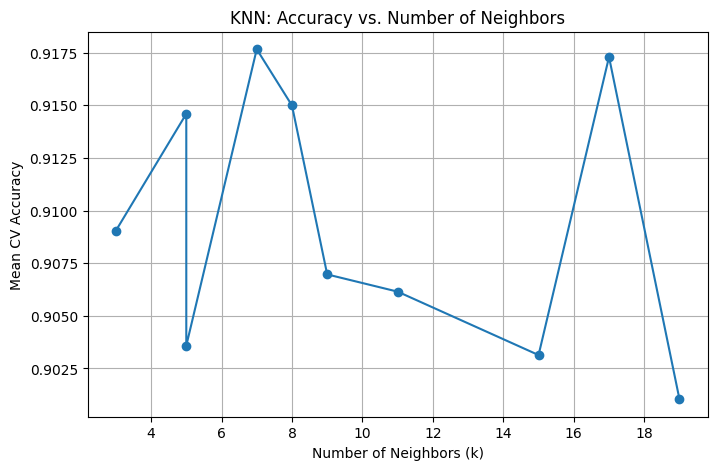

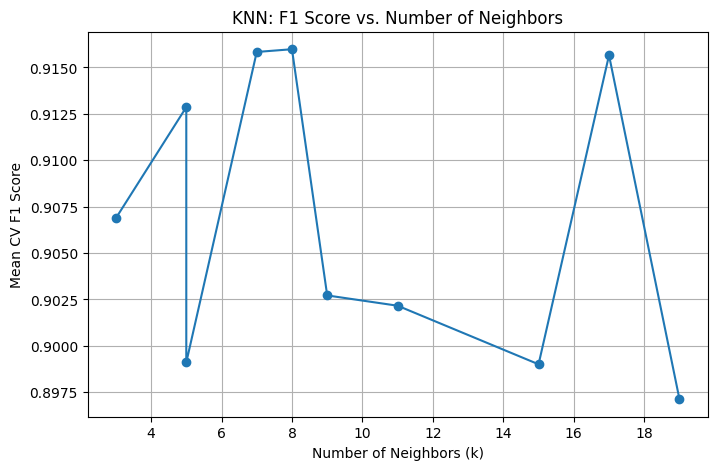

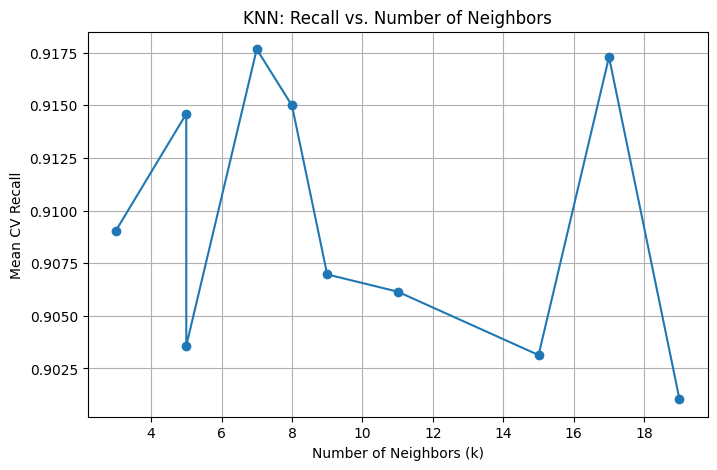

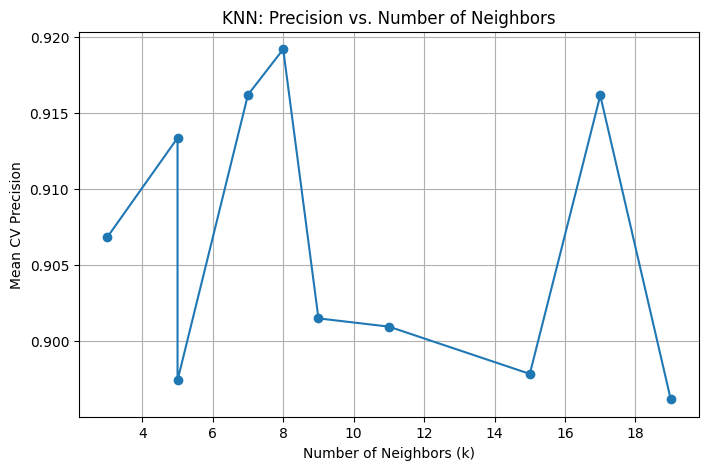

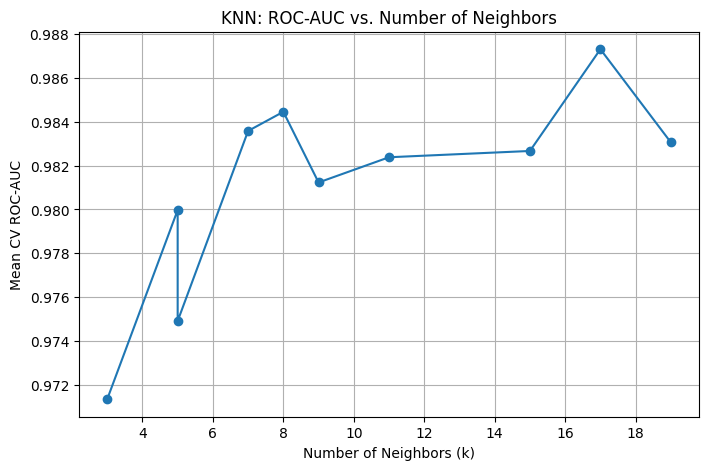

In [3]:
#  KNN Plot..
cv_result_knn = read_processed_data(path=path_knn, log=log)
cv_result_knn = cv_result_knn.sort_values(by="param_n_neighbors")

metrics = [
    ('mean_test_accuracy', 'Accuracy'),
    ('mean_test_f1', 'F1 Score'),
    ('mean_test_recall', 'Recall'),
    ('mean_test_precision', 'Precision'),
    ('mean_test_roc_auc', 'ROC-AUC')
]

for metric, label in metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(cv_result_knn['param_n_neighbors'], cv_result_knn[metric], marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel(f'Mean CV {label}')
    plt.title(f'KNN: {label} vs. Number of Neighbors')
    plt.grid(True)
    plt.savefig(f'knn_{metric}_vs_k.png', dpi=500)
    plt.show()


2025-08-21 02:08:56.561 | INFO     | src.utils:read_processed_data:56 - Data read successfully from /home/runner/work/aqi-healthy-air/aqi-healthy-air/cv_results/xgb_results.csv


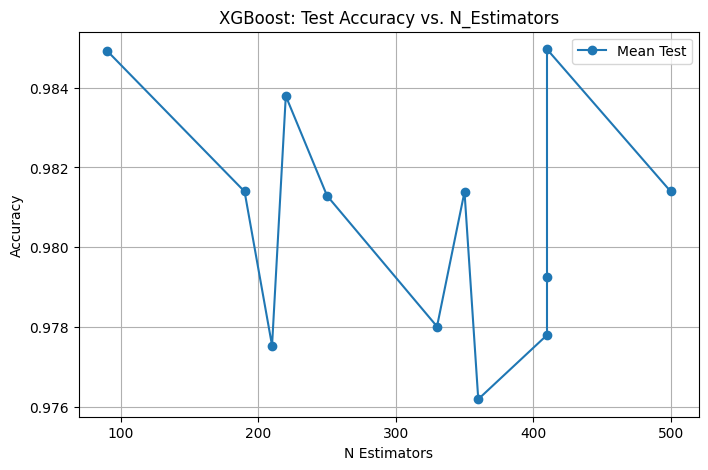

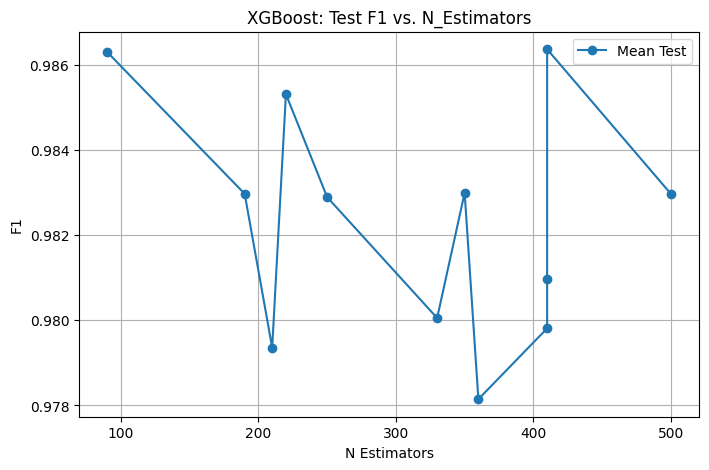

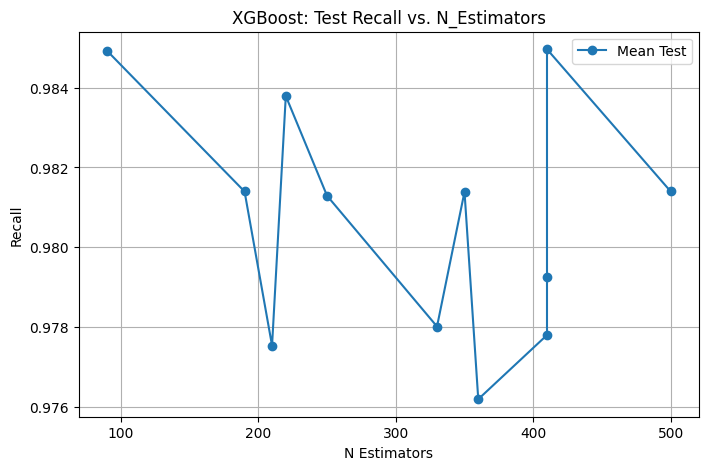

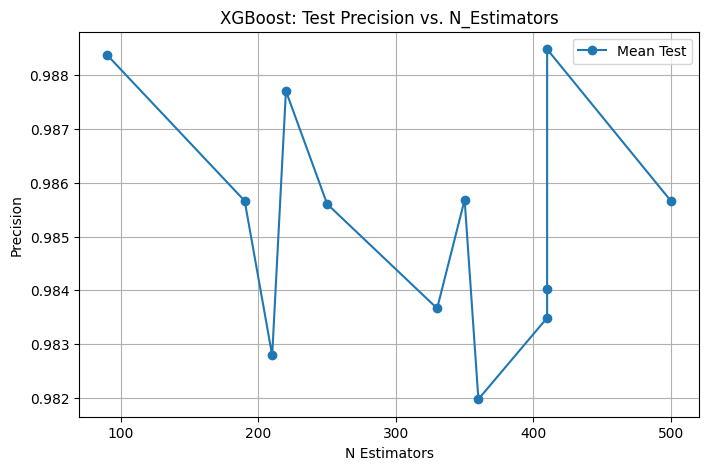

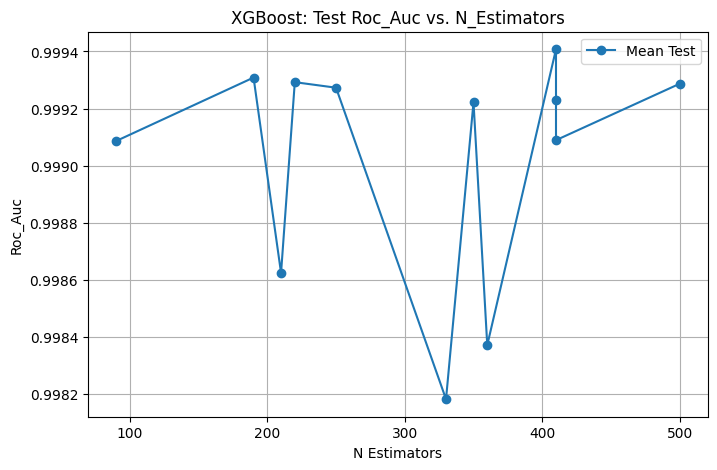

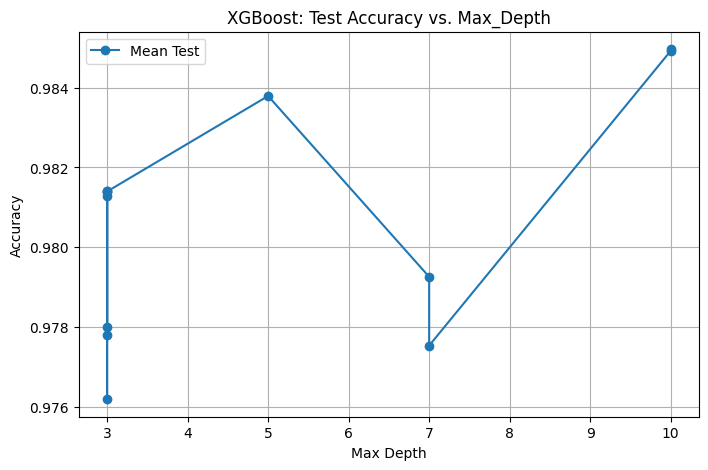

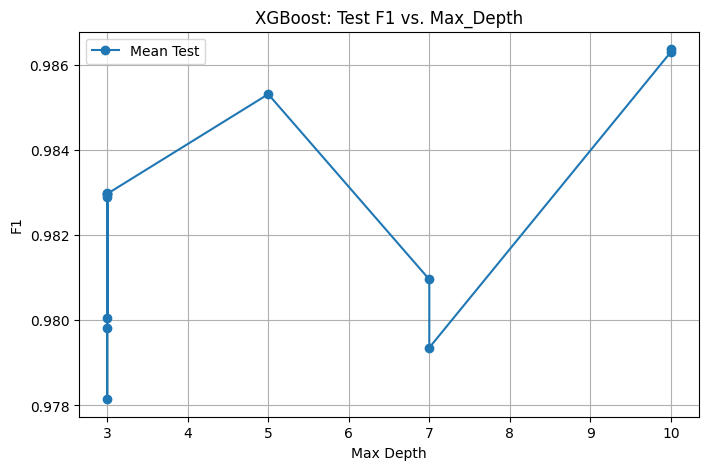

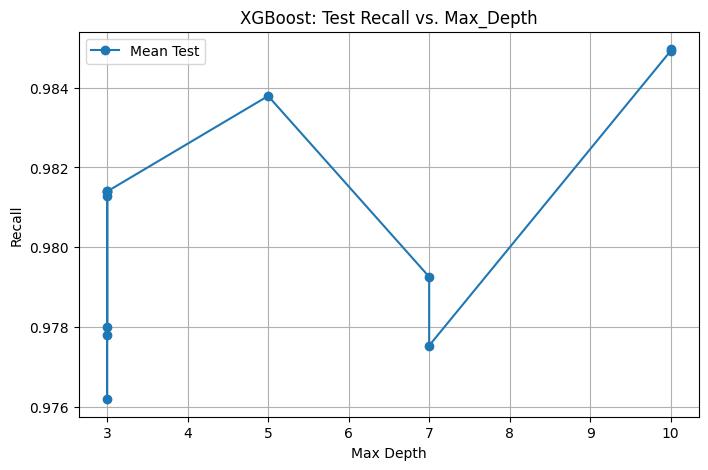

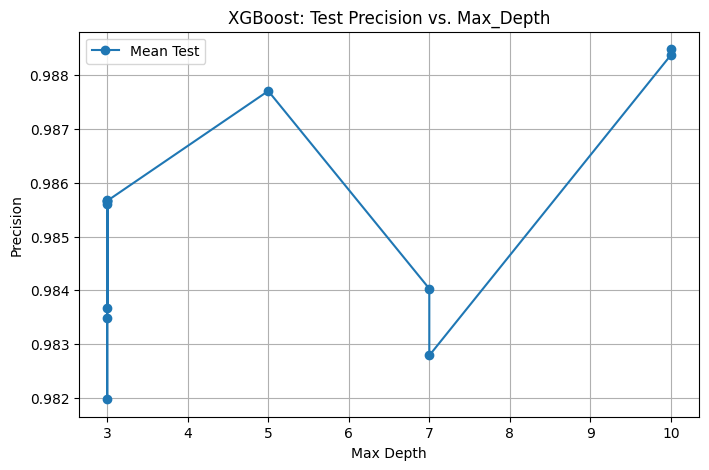

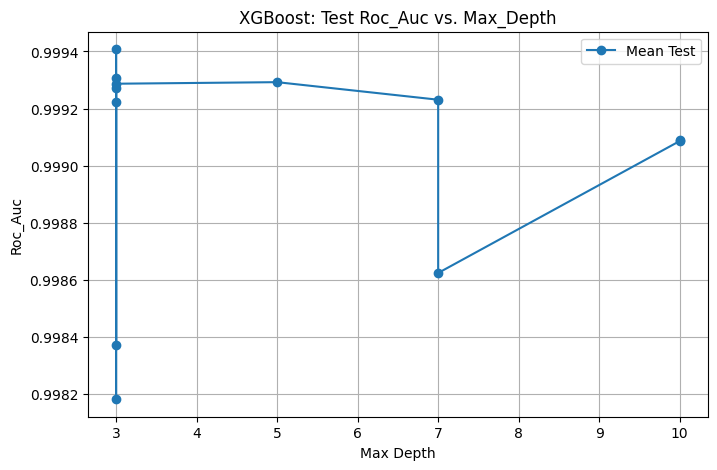

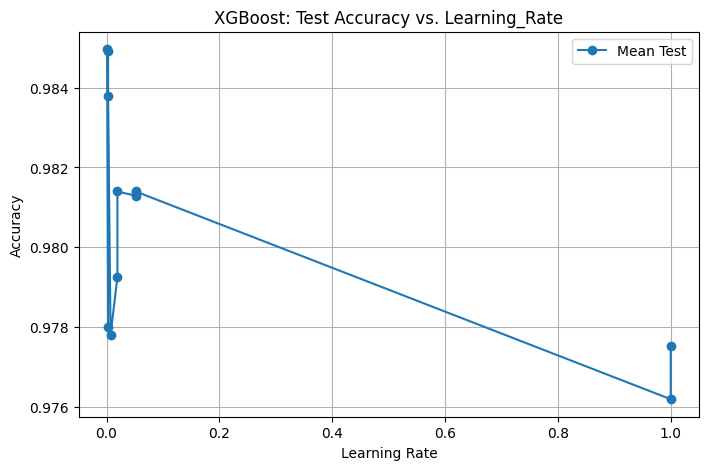

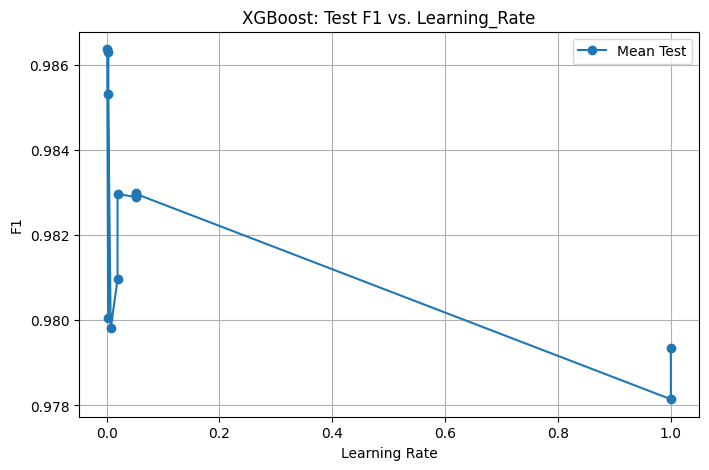

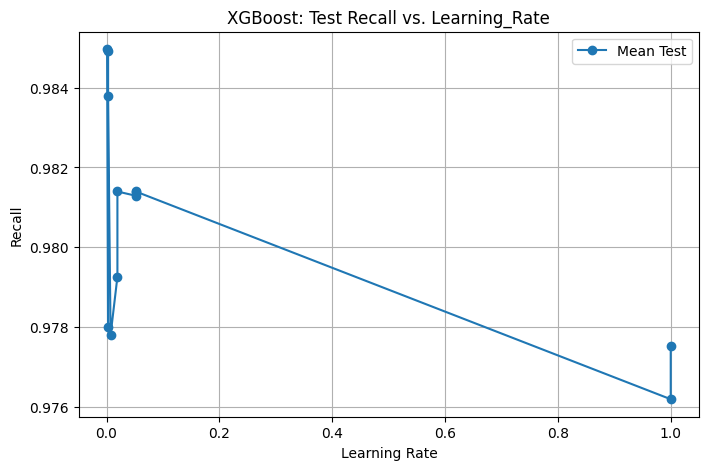

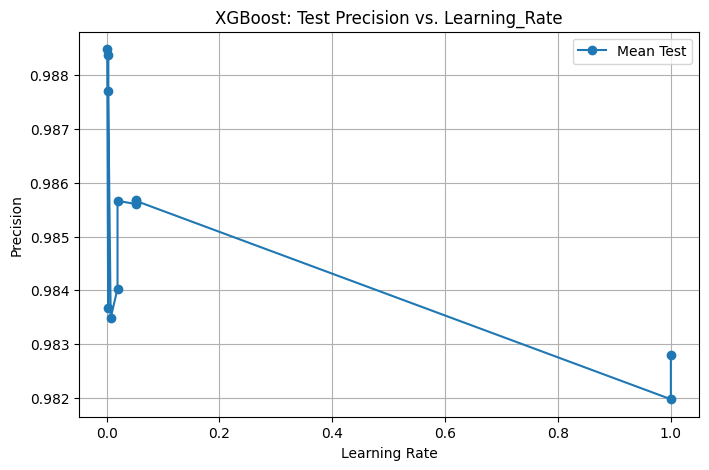

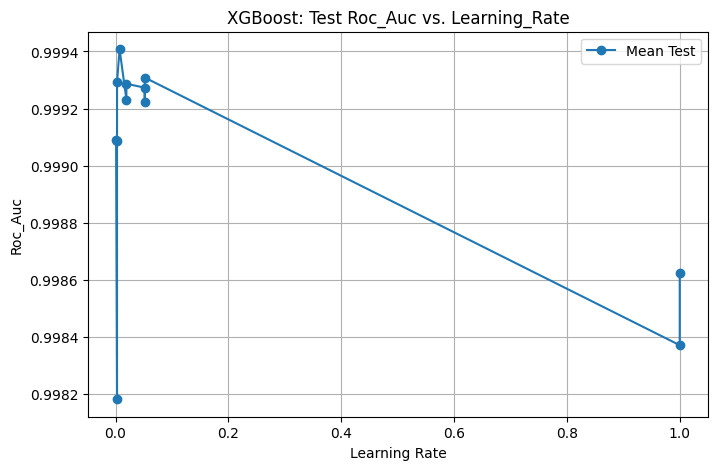

In [4]:
# XGBoost Plot..
cv_result_xgb = read_processed_data(path=path_xgb, log=log)

metrics = [
    ('accuracy', 'mean_test_accuracy'),
    ('f1', 'mean_test_f1'),
    ('recall', 'mean_test_recall'),
    ('precision', 'mean_test_precision'),
    ('roc_auc', 'mean_test_roc_auc')
]

params = ['param_n_estimators', 'param_max_depth', 'param_learning_rate']  
for x_param in params:
    cv_result_xgb = cv_result_xgb.sort_values(by=x_param)
    for label, test_metric in metrics:
        plt.figure(figsize=(8, 5))
        plt.plot(cv_result_xgb[x_param], cv_result_xgb[test_metric], marker='o', label='Mean Test')
        plt.xlabel(x_param.replace('param_', '').replace('_', ' ').title())
        plt.ylabel(label.title())
        plt.title(f'XGBoost: Test {label.title()} vs. {x_param.replace("param_", "").title()}')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'xgb_{label}_train_test_vs_{x_param}.png', dpi=500)
        plt.show()



2025-08-21 02:09:05.079 | INFO     | src.utils:read_processed_data:56 - Data read successfully from /home/runner/work/aqi-healthy-air/aqi-healthy-air/cv_results/rf_results.csv


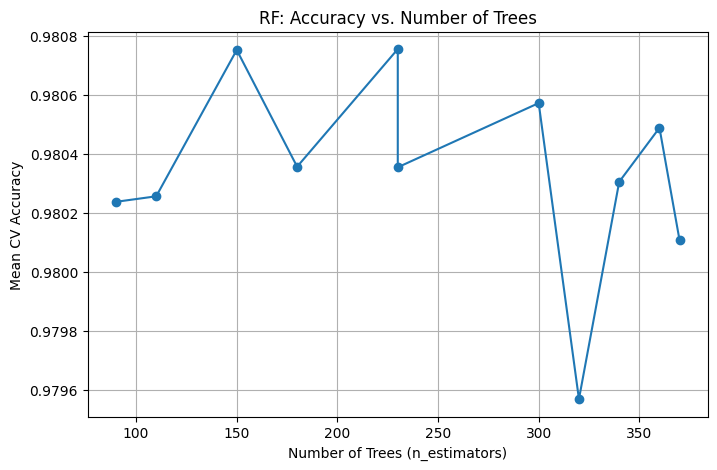

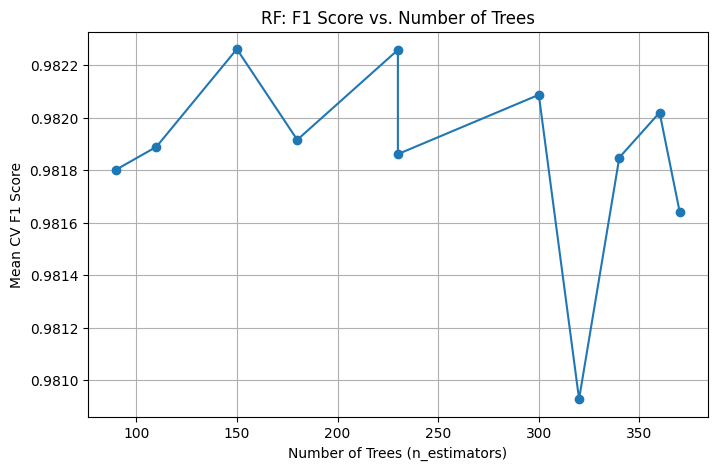

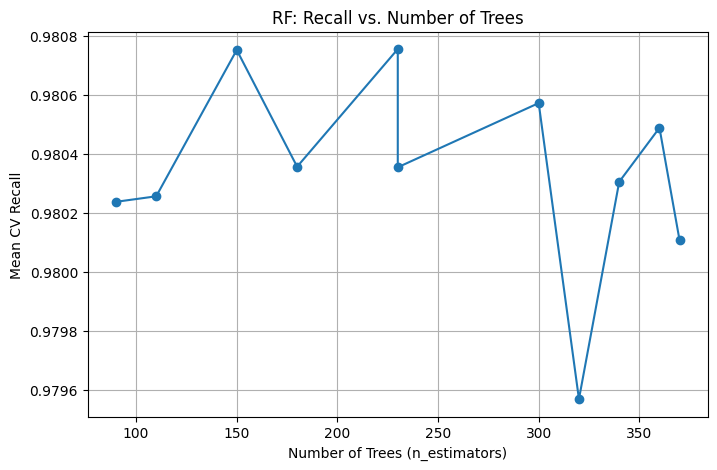

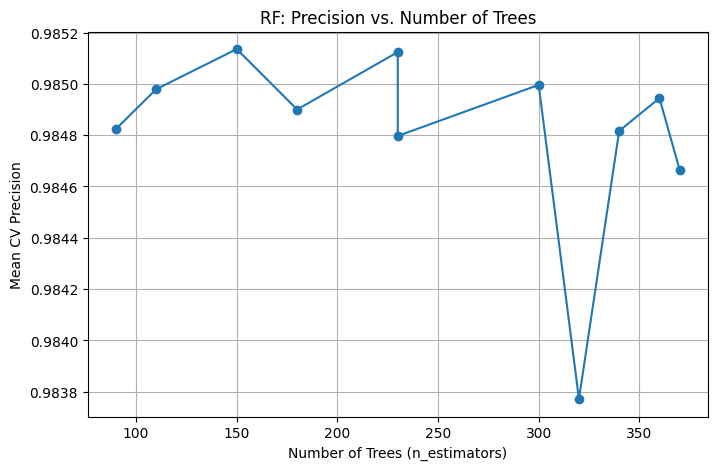

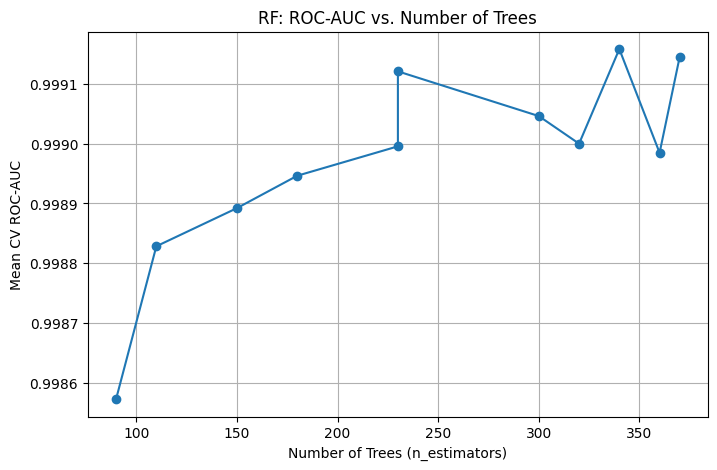

In [5]:
# Random Forest Plot..
cv_result_rf = read_processed_data(path=path_rf, log=log)
cv_result_rf = cv_result_rf.sort_values(by='param_n_estimators')

metrics = [
    ('mean_test_accuracy', 'Accuracy'),
    ('mean_test_f1', 'F1 Score'),
    ('mean_test_recall', 'Recall'),
    ('mean_test_precision', 'Precision'),
    ('mean_test_roc_auc', 'ROC-AUC')
]

for metric, label in metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(cv_result_rf['param_n_estimators'], cv_result_rf[metric], marker='o')
    plt.xlabel('Number of Trees (n_estimators)')
    plt.ylabel(f'Mean CV {label}')
    plt.title(f'RF: {label} vs. Number of Trees')
    plt.grid(True)
    plt.savefig(f'rf_{metric}_vs_estimators.png', dpi=500)
    plt.show()